# Load data and remove untagged phrases

In [1]:
import pandas as pd
import os
from components.datasets.get_go_emotions_dataset import _get_file_name
from components.datasets.utils import get_data_folder_path

LABELS = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
          'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
          'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief',
          'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization',
          'relief', 'remorse', 'sadness', 'surprise', 'neutral']

folder_path = get_data_folder_path()
output_paths = [os.path.join(folder_path, _get_file_name(i)) for i in range(3)]

data = None
labels = []
for output_path in output_paths:
    tmp_data = pd.read_csv(output_path)
    tmp_data = tmp_data[tmp_data["example_very_unclear"] == False]  # only take labeled data
    data = tmp_data if data is None else pd.concat([data, tmp_data]).reset_index()
    labels.extend(list(data.loc[:, LABELS].to_numpy()))
data

,level_0,index,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,0,0.0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,...,0,0,0,0,0,0,0,1,0,0
1,1,2.0,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,...,0,0,0,0,0,0,0,0,0,1
2,2,3.0,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,...,1,0,0,0,0,0,0,0,0,0
3,3,4.0,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,...,0,0,0,0,0,0,0,0,0,1
4,4,5.0,Right? Considering it’s such an important docu...,eespn2i,ImperialBoss,TrueReddit,t3_aizyuz,t1_eesoak0,1.548280e+09,61,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207809,71219,NaN,"Well, I'm glad you're out of all that now. How...",ed89acy,pompompompi,raisedbynarcissists,t3_ac9etw,t1_ed7gt8x,1.546615e+09,2,...,0,0,0,0,0,0,0,0,0,0
207810,71220,NaN,Everyone likes [NAME].,ee6pagw,Senshado,heroesofthestorm,t3_agjf24,t3_agjf24,1.547634e+09,16,...,1,0,0,0,0,0,0,0,0,0
207811,71221,NaN,Well when you’ve imported about a gazillion of...,ef28nod,5inchloser,nottheonion,t3_ak26t3,t3_ak26t3,1.548553e+09,15,...,0,0,0,0,0,0,0,0,0,0
207812,71222,NaN,That looks amazing,ee8hse1,springt1me,shittyfoodporn,t3_agrnqb,t3_agrnqb,1.547684e+09,70,...,0,0,0,0,0,0,0,0,0,0


# Plot emotions distribution

data without modification count = 497662 phrases


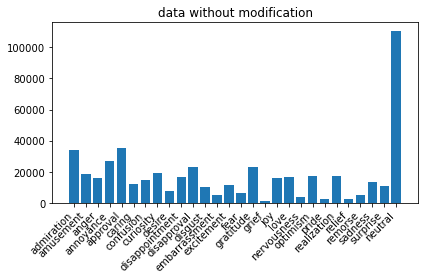

In [2]:
import numpy as np
import matplotlib.pyplot as plt

PATH = os.path.join('results', 'dataset_visualization')

def plot_bar(x_labels, distribution, title=""):
    plt.bar(x_labels, distribution, linewidth=1)
    plt.title(title)
    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True
    plt.xticks(
        rotation=45,
        horizontalalignment='right',
        fontweight='light',
    )
    plt.tight_layout()
    plt.plot()
    print(f'{title} count = {np.sum(distribution)} phrases')
    plt.savefig(os.path.join(PATH, f'{title}.png'), dpi=300)

def get_distributions(labels_result):
    return list(np.sum(np.array(labels_result), axis=0))

plot_bar(LABELS, get_distributions(labels), "data without modification")

# Remove labels with multi class

data after removing phrases with multi-class count = 342752 phrases


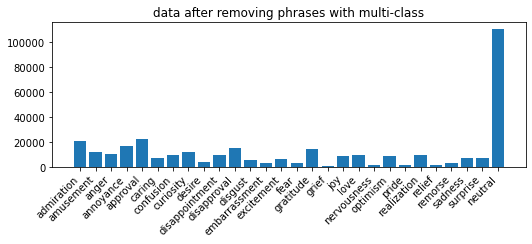

In [3]:
labels_without_multi_class = [label for label in labels if np.sum(label) == 1]
labels_without_multi_class_dist = get_distributions(labels_without_multi_class)
plot_bar(LABELS, labels_without_multi_class_dist, "data after removing phrases with multi-class")

# Under sample neutral labels

In [4]:
required_samples = sorted(labels_without_multi_class_dist[:])[-2]
labels_without_neutral = []
labels_with_neutral = []

for label in labels_without_multi_class:
    if label[-1] == 1:
        labels_with_neutral.append(label)
    else:
        labels_without_neutral.append(label)

# under sample
print(required_samples)
labels_with_neutral = labels_with_neutral[: required_samples]
labels_under_sampled = []
labels_under_sampled.extend(labels_with_neutral)
labels_under_sampled.extend(labels_without_neutral)

22521


# plot under sample

data after removing phrases with multi-class and under-sampling neutral label count = 254870 phrases


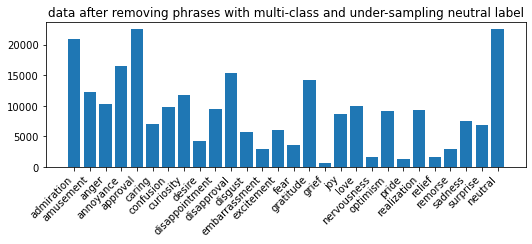

In [5]:
plot_bar(LABELS, get_distributions(labels_under_sampled), "data after removing phrases with multi-class and under-sampling neutral label")

# get rid of labels with low data - grief nervousness pride relief

multi-class removal and under-sampling neutral and low data count = 249584 phrases


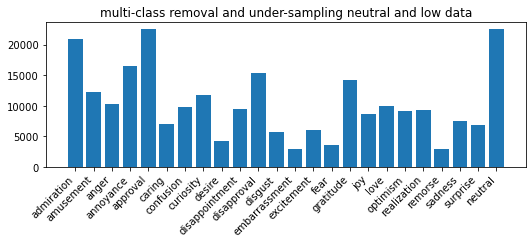

In [8]:
grief_index = LABELS.index("grief")
nervousness_index = LABELS.index("nervousness")
relief_index = LABELS.index("relief")
pride_index = LABELS.index("pride")
emotions_to_discard = ["grief", "nervousness", "relief", "pride"]
indexes_to_remove = [grief_index, nervousness_index, relief_index, pride_index]
labels_after_removing_low_data = [np.delete(label, indexes_to_remove) for label in labels_under_sampled if label[indexes_to_remove].sum() == 0]
new_labels = [l for l in LABELS if l not in emotions_to_discard]
plot_bar(new_labels, get_distributions(labels_after_removing_low_data), "multi-class removal and under-sampling neutral and low data")